In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## 全過程

初期設定

In [2]:
c = 1.0
epsilon0 = 1.0
mu_0 = 1.0 / (epsilon0 * c**2)
m_unit = 1.0
r_m = 1/100
t_r = 1/100
m_electron = 1 * m_unit
m_ion = m_electron / r_m
r_q = 1.0
T_e = 1/2 * m_electron * (0.011*c)**2
T_i = T_e / t_r
n_e = 100
B0 = np.sqrt(n_e) / 10.0
q_unit = np.sqrt(epsilon0 * T_e / n_e)
q_electron = -1 * q_unit
q_ion = r_q * q_unit
n_i = int(n_e * np.abs(q_electron) / q_ion)
omega_pe = np.sqrt(n_e * q_electron**2 / m_electron / epsilon0)
omega_pi = np.sqrt(n_i * q_ion**2 / m_ion / epsilon0)
omega_ce = q_electron * B0 / m_electron
omega_ci = q_ion * B0 / m_ion
V_A = c * np.sqrt(B0**2 / (n_e*m_electron + n_i*m_ion))
C_S = np.sqrt(r_m * T_e)
debye_length = np.sqrt(epsilon0 * T_e / n_e / q_electron**2)

dx = debye_length
n_x = 512
x_max = n_x * dx
x_coordinate = np.arange(0.0, x_max, dx)
dt = 0.5
step = 10000
t_max = step * dt
v_thermal_ion = np.sqrt(T_i / m_ion)
v_thermal_electron = np.sqrt(T_e / m_electron)
v_ion = np.array([0.0, 0.0, 0.0])
v_electron = np.array([-10.0*v_thermal_ion, 0.0, 0.0])
v_beam = np.array([10.0*v_thermal_ion, 0.0, 0.0])
if c * dt > dx:
    print(f"You had better change some parameters! \nCFL condition is not satisfied \n c * dt = {c * dt} > dx = {dx} \n")
else:
    print(f'c * dt = {c * dt} < dx = {dx} \n')

if omega_pe * dt > 0.2:
    print(f"You had better change some parameters! \n$\omega$_pe * dt = {omega_pe * dt} > 0.1 \n")
if round(dx, 5) != 1.0:
    print(f"You had better change some parameters! \ndebye length = {debye_length} should be equal to grid size = {dx} \n")


n_plus = int(n_x * n_i)
n_minus = int(n_x * n_e / 2)
n_beam = int(n_x * n_e / 2)
print(f"total number of particle is {n_plus + n_minus + n_beam}")

c * dt = 0.5 < dx = 1.0 

total number of particle is 102400


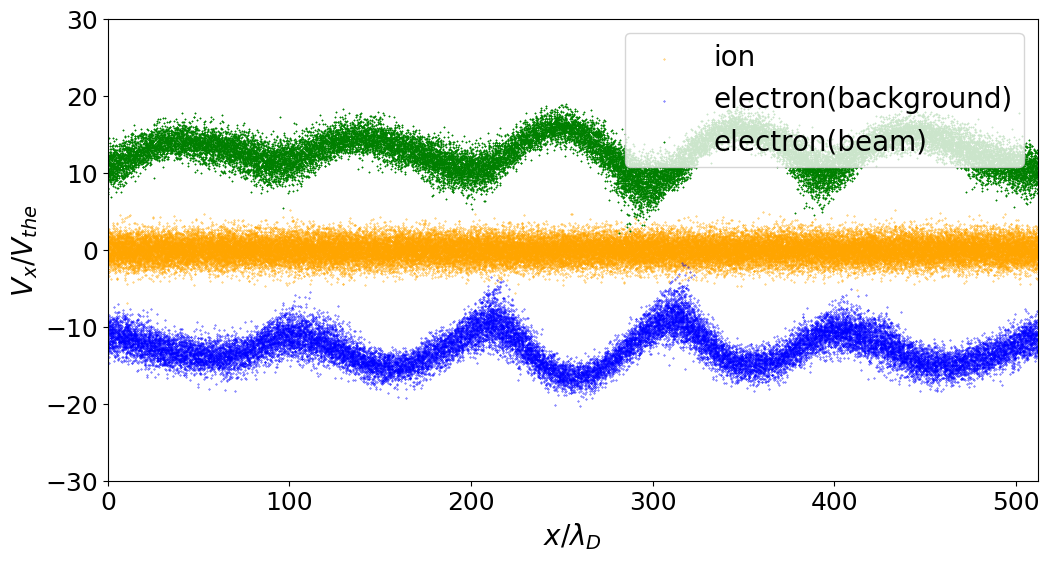

In [3]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

step = 2000
x_ion = np.loadtxt(f"./results/two_stream_electron_x_ion_{step}.txt", delimiter=',')
v_ion = np.loadtxt(f"./results/two_stream_electron_v_ion_{step}.txt", delimiter=',')
x_electron = np.loadtxt(f"./results/two_stream_electron_x_electron_{step}.txt", delimiter=',')
v_electron = np.loadtxt(f"./results/two_stream_electron_v_electron_{step}.txt", delimiter=',')
ax.scatter(x_ion[:, 0], v_ion[:, 0]/v_thermal_electron, s=0.1, c='orange', label='ion')
ax.scatter(x_electron[:n_minus, 0], v_electron[:n_minus, 0]/v_thermal_electron, s=0.1, c='blue', label='electron(background)')
ax.scatter(x_electron[n_minus:, 0], v_electron[n_minus:, 0]/v_thermal_electron, s=0.1, c='green', marker='*', label='electron(beam)')
ax.set_xlim(0, x_max)
ax.set_ylim(-30, 30)
ax.set_xlabel('$x / \lambda_D$', fontsize=20)
ax.set_ylabel('$V_x / V_{the}$', fontsize=20)
ax.tick_params(labelsize=18)
ax.legend(loc='upper right', fontsize=20)

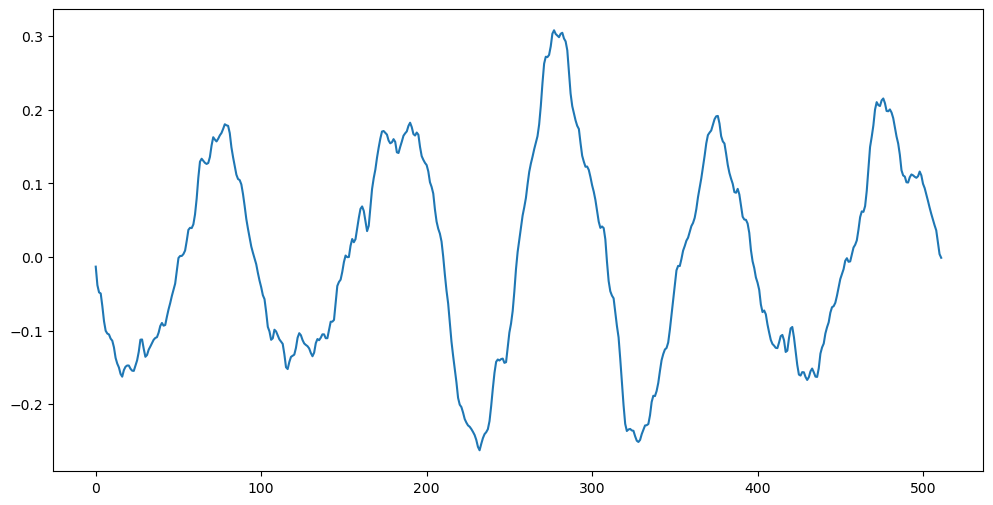

In [65]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

step = 2000
E = np.loadtxt(f"./results/two_stream_electron_E_{step}.txt", delimiter=',').reshape(3, n_x)
B = np.loadtxt(f"./results/two_stream_electron_B_{step}.txt", delimiter=',').reshape(3, n_x)
current = np.loadtxt(f"./results/two_stream_electron_current_{step}.txt", delimiter=',').reshape(3, n_x)
ax.plot(E[0, :])

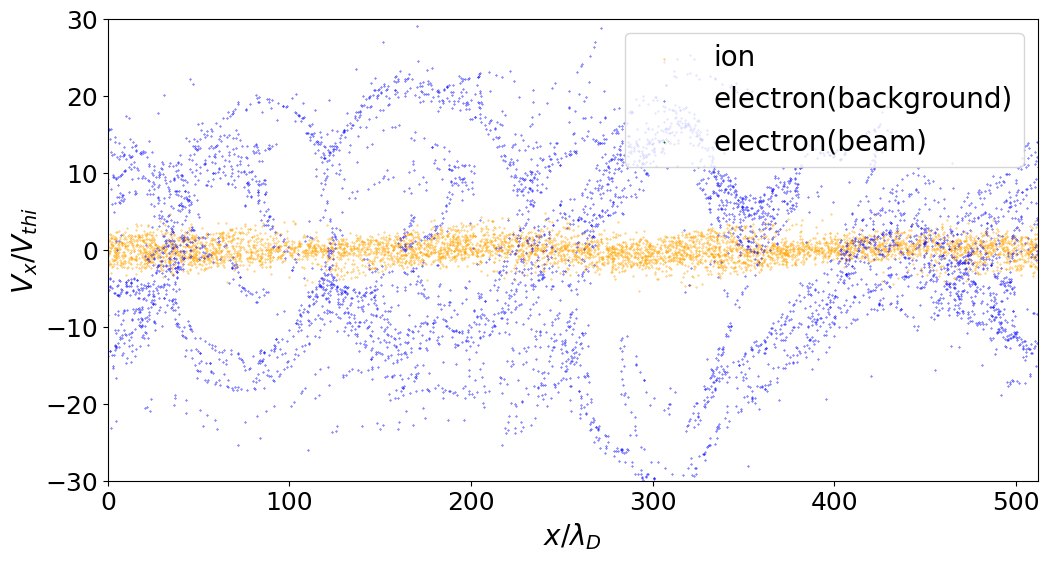

In [51]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

total_steps = 10000
for step in range(0, total_steps+1, 100):
    ax.clear()
    x_ion = np.loadtxt(f"./results/two_stream_electron_x_ion_{step}.txt", delimiter=',')
    v_ion = np.loadtxt(f"./results/two_stream_electron_v_ion_{step}.txt", delimiter=',')
    x_electron = np.loadtxt(f"./results/two_stream_electron_x_electron_{step}.txt", delimiter=',')
    v_electron = np.loadtxt(f"./results/two_stream_electron_v_electron_{step}.txt", delimiter=',')
    ax.scatter(x_ion[:, 0], v_ion[:, 0]/v_thermal_ion, s=0.1, c='orange', label='ion')
    ax.scatter(x_electron[:n_minus, 0], v_electron[:n_minus, 0]/v_thermal_electron, s=0.1, c='blue', label='electron(background)')
    ax.scatter(x_electron[n_minus:, 0], v_electron[n_minus:, 0]/v_thermal_electron, s=0.1, c='green', marker='*', label='electron(beam)')
    ax.set_xlim(0, x_max)
    ax.set_ylim(-30, 30)
    ax.set_xlabel('$x / \lambda_D$', fontsize=20)
    ax.set_ylabel('$V_x / V_{thi}$', fontsize=20)
    ax.tick_params(labelsize=18)
    ax.legend(loc='upper right', fontsize=20)
    fig.savefig(f'./pictures/{step}.png', dpi=200)


img = cv2.imread(f'./pictures/0.png')
framesize = (img.shape[1], img.shape[0])
fps = 10.0

fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
video  = cv2.VideoWriter(filename=f'two_stream_electron.mp4', fourcc=fourcc, fps=fps, frameSize=framesize)

for i in range(0, total_steps+1, 100):
    img = cv2.imread(f'./pictures/{i}.png')
    video.write(img)
video.release()

0.0


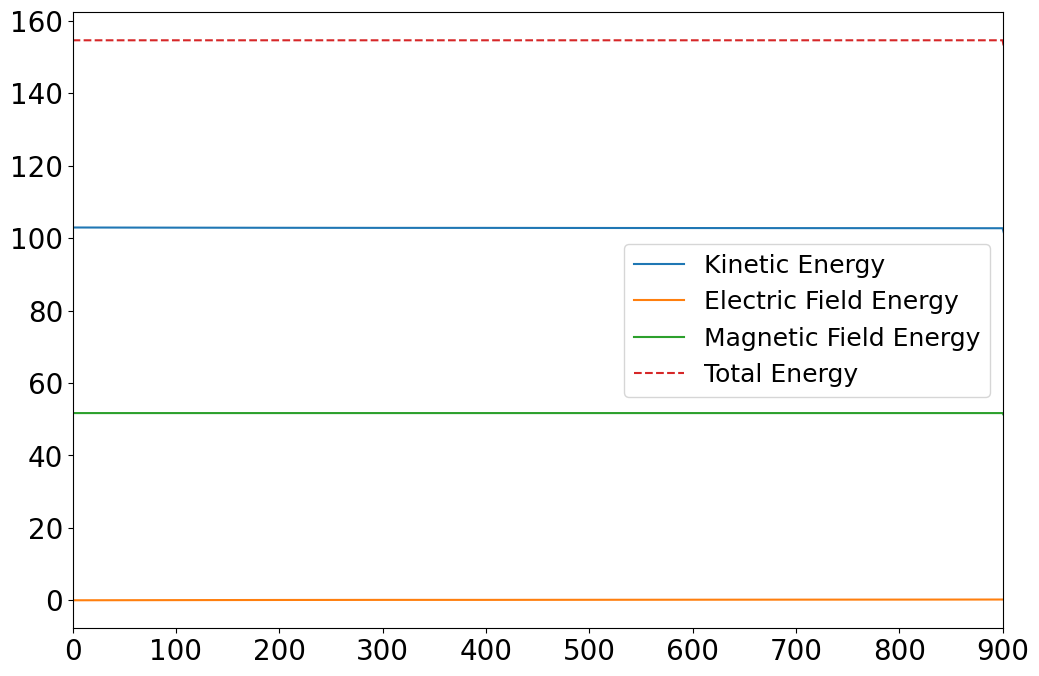

In [74]:
total_steps = 10000
interval = 100
num_results = int(total_steps/interval) + 1
kinetic_energy = np.zeros(num_results)
electric_field_energy = np.zeros(num_results)
magnetic_field_energy = np.zeros(num_results)
t = np.arange(0.0, total_steps+1, interval)

for step in range(0, total_steps, interval):
    results_KE = np.loadtxt(f"./results1/two_stream_electron_KE_{step}.txt", delimiter=',')
    results_EEnergy = np.loadtxt(f"./results1/two_stream_electron_EEnergy_{step}.txt", delimiter=',')
    results_BEnergy = np.loadtxt(f"./results1/two_stream_electron_BEnergy_{step}.txt", delimiter=',')
    kinetic_energy[int(step/interval)] = results_KE
    electric_field_energy[int(step/interval)] = results_EEnergy
    magnetic_field_energy[int(step/interval)] = results_BEnergy

total_energy = kinetic_energy + electric_field_energy + magnetic_field_energy
print(total_energy[-1] / total_energy[0])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.plot(t, kinetic_energy, label='Kinetic Energy')
ax.plot(t, electric_field_energy, label='Electric Field Energy')
ax.plot(t, magnetic_field_energy, label='Magnetic Field Energy')
ax.plot(t, total_energy, label='Total Energy', ls='--')
ax.legend(loc='best', fontsize=18)
ax.set_xlim(0.0, step)
ax.tick_params(labelsize=20)
fig.savefig("two_stream_electron_energy.png")
plt.show()

### 分散関係などを調べる

【理論】
電場をフーリエ変換した際、ピーク周辺の波数$k_{max}$と成長率$\gamma_{max}$の関係は、
\begin{equation*}
    \gamma_{max} \simeq \dfrac{\omega_{pe}}{4}
\end{equation*}

\begin{equation*}
    k_{max} \simeq \dfrac{\sqrt{3}}{2} \dfrac{\omega_{pe}}{v_d}
\end{equation*}
となる（らしい）。$v_d$は熱速度×(ビーム電子速度/背景電子速度)。

$\ln |E_k|^2$と$\omega_{pe}t$のグラフを作るとき、序盤の傾きが$\frac{1}{2}$になってればOK。

http://www.astro.phys.s.chiba-u.ac.jp/pcans/em1d_ebeam.html#id4

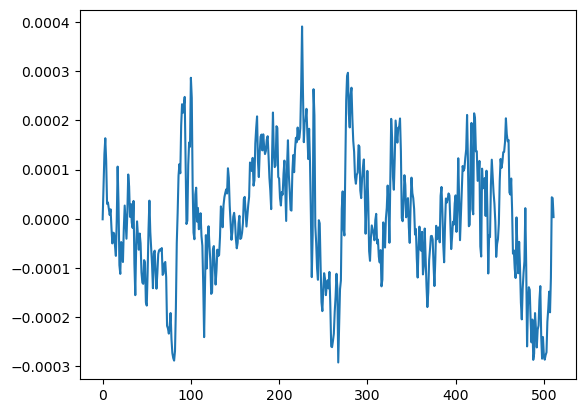

In [8]:
results_E = np.loadtxt('two_stream_electron/two_stream_electron_current_3000.csv', delimiter=',')
plt.plot(results_E[:, 0])

(0.0, 10.0)

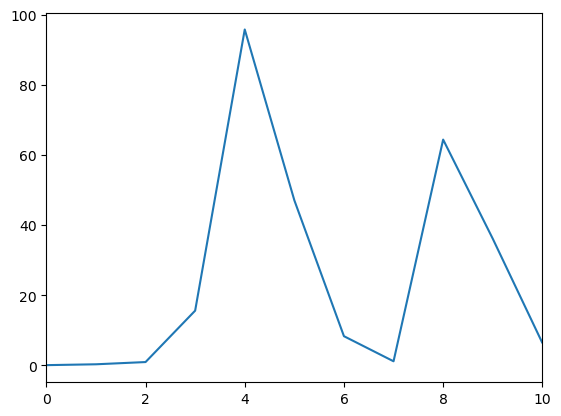

In [5]:
results_E = np.loadtxt('two_stream_electron/two_stream_electron_E_3000.csv', delimiter=',')

E_FFT = np.fft.fft(results_E[:, 0] * np.hanning(n_x))
peak_index = np.argsort(E_FFT[:n_x//2].real**2)[-2:]

plt.plot(E_FFT.real**2)
plt.xlim(0, 10)

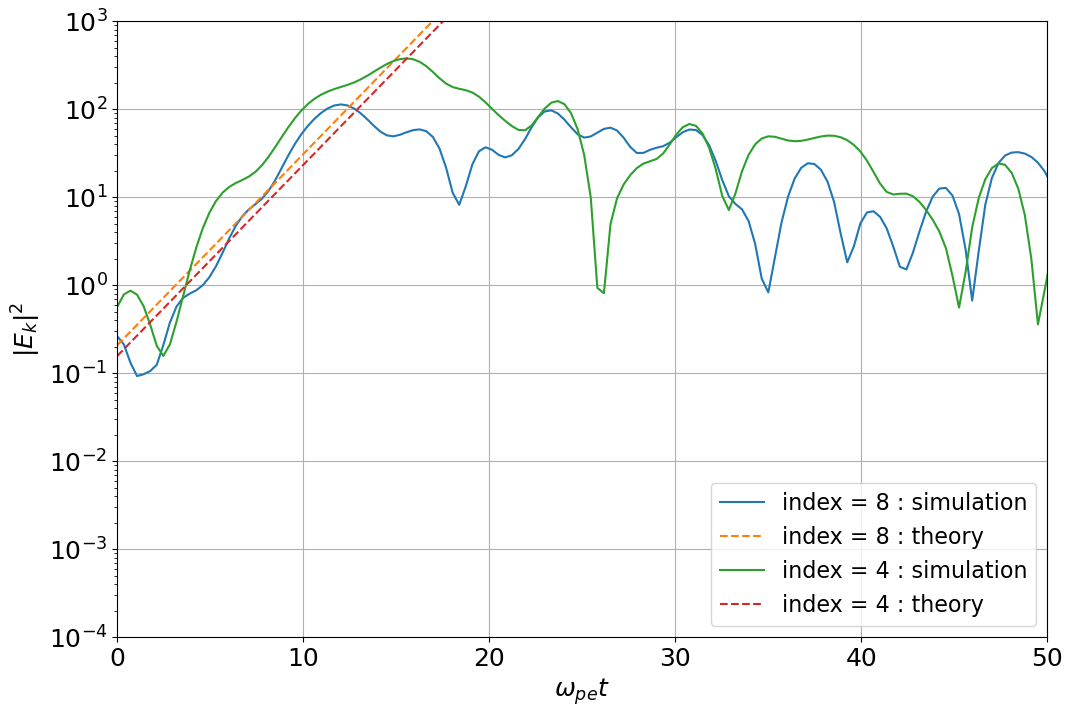

In [6]:
results_E = np.loadtxt('two_stream_electron/two_stream_electron_E_3000.csv', delimiter=',')

E_FFT = np.fft.fft(results_E[:, 0] * np.hanning(n_x))
peak_index = np.argsort(E_FFT[:n_x//2].real**2)[-2:]

step = 30000
number_of_results = 301
FFT_peak = np.zeros([len(peak_index), number_of_results], dtype=np.complex64)
for i in range(number_of_results):
    results_E = np.loadtxt(f'two_stream_electron/two_stream_electron_E_{i*100}.csv', delimiter=',')
    E_FFT = np.fft.fft(results_E[:, 0] * np.hanning(n_x))
    FFT_peak[:, i] = E_FFT[peak_index]


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
for i in range(len(peak_index)):
    t = np.arange(0.0, step+1, 100)
    ax.plot(omega_pe * t, np.abs(FFT_peak[i]) ** 2, label=f'index = {peak_index[i]} : simulation')
    ax.plot(omega_pe * t, np.abs(FFT_peak[i])[7] ** 2 * np.exp(1/2 * (t*omega_pe)), ls='--', label=f'index = {peak_index[i]} : theory')
    
ax.grid()
ax.set_yscale('log')
ax.set_xlabel('$\omega_{pe}t$', fontsize=18)
ax.set_ylabel('$|E_k|^2$', fontsize=18)
ax.set_xlim(0, 50)
ax.set_ylim(1e-4, 1e3)
ax.tick_params(labelsize=18)
ax.legend(loc='lower right', fontsize=16)
fig.savefig('two_stream_electron_E_x_dispersion_cpp.png')
plt.show()